<h1 align="center">Heart Attack - EDA</h1>

1. [Introduction](#1)
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Task](#3)
    - 1.3 [Understanding Data](#21)
2. [Preparation](#4)
    - 2.1 [Packages](#5)
    - 2.2 [Data](#6)
    - 2.3 [Understanding Data](#7)
3. [Exploratory Data Analysis](#8)
    - 3.1 [Univariate Analysis](#9)
    - 3.2 [Bivariate Analysis](#10)
4. [Data Preprocessing](#11)
    - 4.1 [Conclusions from the EDA](#12)
    - 4.2 [Packages](#13)
    - 4.3 [Making features model ready](#14)
5. [Modeling](#15)
    - 5.1 [Linear Classifiers](#16)
    - 5.2 [Tree Models](#17)
    

### 1. Introduction <a id=1></a>

#### 1.1 Data Dictionary <a id=2></a>
`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

**Additional Variables Explaination from Kaggle**

**age** - age in years

**sex** - sex (1 = male; 0 = female)

**cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

**chol** - serum cholestoral in mg/dl

**fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**restecg** - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

**ca** - number of major vessels (0-3) colored by flourosopy

**thal** - 2 = normal; 1 = fixed defect; 3 = reversable defect

**num** - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

    Variable definition can be found in the discussion section

#### 1.2 Task <a id=3></a>
To perform EDA and predict if a person is prone to a heart attack or not.

#### 1.3 Understanding Data <a id=21></a>
* What is Heart Attack?





* How does it Happen?




* What are the most contributing Factors for heart attack to happen ?



* symptoms of heart attack for male and female?


### 2. Preparation <a id=4></a>

#### 2.1 Packages <a id=5></a>

In [101]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import copy
%matplotlib inline 
sns.set()

#### 2.2 Data <a id=6></a>

In [102]:
cleavland = pd.read_csv('processed.cleveland.data',encoding='latin1',header=None)
hungarian = pd.read_csv('processed.hungarian.data',encoding='latin1',header=None)
v_data  = pd.read_csv('processed.va.data',encoding='latin1',header=None)
switzerland = pd.read_csv('processed.switzerland.data',encoding = 'latin1',header=None)

In [103]:
column_names  = {
    0:'age',
    1:'sex',
    2:'cp',
    3:'trestbps',
    4:'chol',
    5:'fbs',
    6:'restecg',
    7:'thalach',
    8:'exang',
    9:'oldpeak',
    10:'slope',
    11:'ca',
    12:'thal',
    13:'target'
}

In [104]:
heart_df = pd.concat([cleavland,hungarian,v_data,switzerland])
heart_df.rename(columns=column_names,inplace=True)
heart_attack = copy.deepcopy(heart_df)

#### 2.3 Understanding Data <a id=7></a>

##### 2.3.1 The shape of the data

In [105]:
heart_attack.shape 

(920, 14)

##### 2.3.2 Preview of the first 5 rows of the data

In [106]:
heart_attack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [107]:
for column in heart_attack.columns:
    sum_of_non_number = (heart_attack[column]=='?').sum()
    print(column.title())
    print(sum_of_non_number)
    print(30*"---")

Age
0
------------------------------------------------------------------------------------------
Sex
0
------------------------------------------------------------------------------------------
Cp
0
------------------------------------------------------------------------------------------
Trestbps
59
------------------------------------------------------------------------------------------
Chol
30
------------------------------------------------------------------------------------------
Fbs
90
------------------------------------------------------------------------------------------
Restecg
2
------------------------------------------------------------------------------------------
Thalach
55
------------------------------------------------------------------------------------------
Exang
55
------------------------------------------------------------------------------------------
Oldpeak
62
------------------------------------------------------------------------------------------
Slope

In [108]:
heart_attack.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920.0,NaN,NaN,NaN,0.78913,0.408148,0.0,1.0,1.0,1.0,1.0
cp,920.0,NaN,NaN,NaN,3.25,0.930969,1.0,3.0,4.0,4.0,4.0
trestbps,920,103,120,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,920.0,336.0,0.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,920,5,0,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,920,7,0,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,920,198,?,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exang,920,5,0,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,920.0,82.0,0.0,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  target    920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB


In [110]:
heart_attack = heart_attack.replace('?',np.NaN)

In [111]:
for column in heart_attack.columns:
    sum_of_non_number = (heart_attack[column]=='?').sum()
    print(column.title())
    print(sum_of_non_number)
    print(30*"---")

Age
0
------------------------------------------------------------------------------------------
Sex
0
------------------------------------------------------------------------------------------
Cp
0
------------------------------------------------------------------------------------------
Trestbps
0
------------------------------------------------------------------------------------------
Chol
0
------------------------------------------------------------------------------------------
Fbs
0
------------------------------------------------------------------------------------------
Restecg
0
------------------------------------------------------------------------------------------
Thalach
0
------------------------------------------------------------------------------------------
Exang
0
------------------------------------------------------------------------------------------
Oldpeak
0
------------------------------------------------------------------------------------------
Slope
0
---

In [112]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    object 
 4   chol      890 non-null    object 
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalach   865 non-null    object 
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    object 
 10  slope     611 non-null    object 
 11  ca        309 non-null    object 
 12  thal      434 non-null    object 
 13  target    920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB


In [113]:
import missingno as msn

<AxesSubplot:>

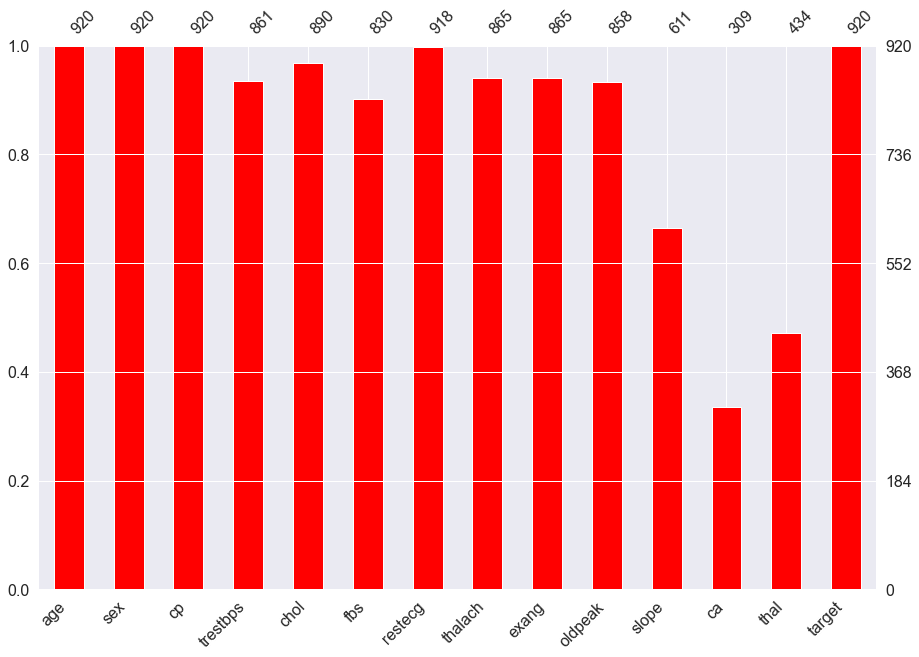

In [114]:
msn.bar(heart_attack,figsize=(15,10),color='red')

#### Split Data between Numeric and Categorical to further inspect Missing Values

In [115]:
numeric_var = ["age","trestbps","chol","thalach","oldpeak"]
categorical_var = ["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]

In [116]:
heart_cat = heart_attack[categorical_var]

In [117]:
for column in heart_cat:
    print(column)
    print(heart_cat[column].isna().sum())
    print(10*"-")

sex
0
----------
cp
0
----------
fbs
90
----------
restecg
2
----------
exang
55
----------
slope
309
----------
ca
611
----------
thal
486
----------
target
0
----------


In [118]:
for column in heart_cat:
    print(column)
    print(heart_cat[column].unique())
    print(10*"-")

sex
[1. 0.]
----------
cp
[1. 4. 3. 2.]
----------
fbs
[1.0 0.0 '0' nan '1']
----------
restecg
[2.0 0.0 1.0 '2' '0' '1' nan]
----------
exang
[0.0 1.0 '0' '1' nan]
----------
slope
[3.0 2.0 1.0 nan '2' '1' '3']
----------
ca
['0.0' '3.0' '2.0' '1.0' nan '0' '1' '2']
----------
thal
['6.0' '3.0' '7.0' nan '6' '3' '7']
----------
target
[0 2 1 3 4]
----------


In [119]:
heart_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 122
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      920 non-null    float64
 1   cp       920 non-null    float64
 2   fbs      830 non-null    object 
 3   restecg  918 non-null    object 
 4   exang    865 non-null    object 
 5   slope    611 non-null    object 
 6   ca       309 non-null    object 
 7   thal     434 non-null    object 
 8   target   920 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 71.9+ KB


In [120]:
heart_cat = heart_cat.astype('float64')
# heart_cat = heart_cat.astype('int64')

In [121]:
heart_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 122
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      920 non-null    float64
 1   cp       920 non-null    float64
 2   fbs      830 non-null    float64
 3   restecg  918 non-null    float64
 4   exang    865 non-null    float64
 5   slope    611 non-null    float64
 6   ca       309 non-null    float64
 7   thal     434 non-null    float64
 8   target   920 non-null    float64
dtypes: float64(9)
memory usage: 71.9 KB


In [122]:
for column in heart_cat:
    print(column)
    print(heart_cat[column].unique())
    print(10*"-")

sex
[1. 0.]
----------
cp
[1. 4. 3. 2.]
----------
fbs
[ 1.  0. nan]
----------
restecg
[ 2.  0.  1. nan]
----------
exang
[ 0.  1. nan]
----------
slope
[ 3.  2.  1. nan]
----------
ca
[ 0.  3.  2.  1. nan]
----------
thal
[ 6.  3.  7. nan]
----------
target
[0. 2. 1. 3. 4.]
----------


In [123]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [124]:
imputer_itr = IterativeImputer(initial_strategy='most_frequent')

In [125]:
# imputer_itr.fit(heart_cat)

In [126]:
imputed_cat = imputer_itr.fit_transform(heart_cat)

In [127]:
cat_df = pd.DataFrame(data=imputed_cat , columns=heart_cat.columns)

In [128]:
cat_df

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1.0,1.0,1.000000,2.0,0.0,3.0,0.000000,6.000000,0.0
1,1.0,4.0,0.000000,2.0,1.0,2.0,3.000000,3.000000,2.0
2,1.0,4.0,0.000000,2.0,1.0,2.0,2.000000,7.000000,1.0
3,1.0,3.0,0.000000,0.0,0.0,3.0,0.000000,3.000000,0.0
4,0.0,2.0,0.000000,2.0,0.0,1.0,0.000000,3.000000,0.0
...,...,...,...,...,...,...,...,...,...
915,1.0,4.0,0.000000,1.0,1.0,2.0,0.581060,7.000000,1.0
916,1.0,4.0,1.000000,0.0,1.0,2.0,1.542559,7.000000,3.0
917,1.0,3.0,0.461897,2.0,0.0,2.0,2.000000,4.796772,0.0
918,0.0,3.0,0.000000,1.0,0.0,1.0,0.769339,3.000000,1.0


In [129]:
cat_df = cat_df.astype('int64')

In [130]:
cat_df

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,1,1,2,0,3,0,6,0
1,1,4,0,2,1,2,3,3,2
2,1,4,0,2,1,2,2,7,1
3,1,3,0,0,0,3,0,3,0
4,0,2,0,2,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...
915,1,4,0,1,1,2,0,7,1
916,1,4,1,0,1,2,1,7,3
917,1,3,0,2,0,2,2,4,0
918,0,3,0,1,0,1,0,3,1


In [131]:
cat_df.shape

(920, 9)

In [132]:
heart_num = heart_attack[numeric_var]

In [133]:
heart_num

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4
...,...,...,...,...,...
118,70.0,115,0,92,0
119,70.0,140,0,157,2
120,72.0,160,0,114,1.6
121,73.0,160,0,121,0


In [134]:
heart_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 122
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   trestbps  861 non-null    object 
 2   chol      890 non-null    object 
 3   thalach   865 non-null    object 
 4   oldpeak   858 non-null    object 
dtypes: float64(1), object(4)
memory usage: 43.1+ KB


In [135]:
heart_num = heart_num.astype('float64')

In [136]:
heart_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 122
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   trestbps  861 non-null    float64
 2   chol      890 non-null    float64
 3   thalach   865 non-null    float64
 4   oldpeak   858 non-null    float64
dtypes: float64(5)
memory usage: 43.1 KB


In [137]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [138]:
iter_imp = IterativeImputer()

In [139]:
num_df = iter_imp.fit_transform(heart_num)

In [140]:
num_df = pd.DataFrame(data=num_df,columns=heart_num.columns)

In [141]:
num_df

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4
...,...,...,...,...,...
915,70.0,115.0,0.0,92.0,0.0
916,70.0,140.0,0.0,157.0,2.0
917,72.0,160.0,0.0,114.0,1.6
918,73.0,160.0,0.0,121.0,0.0


In [142]:
for column in num_df.columns:
    print(column.title(),end = " ")
    print(num_df[column].isnull().sum())
    print(30*"--")

Age 0
------------------------------------------------------------
Trestbps 0
------------------------------------------------------------
Chol 0
------------------------------------------------------------
Thalach 0
------------------------------------------------------------
Oldpeak 0
------------------------------------------------------------


<AxesSubplot:>

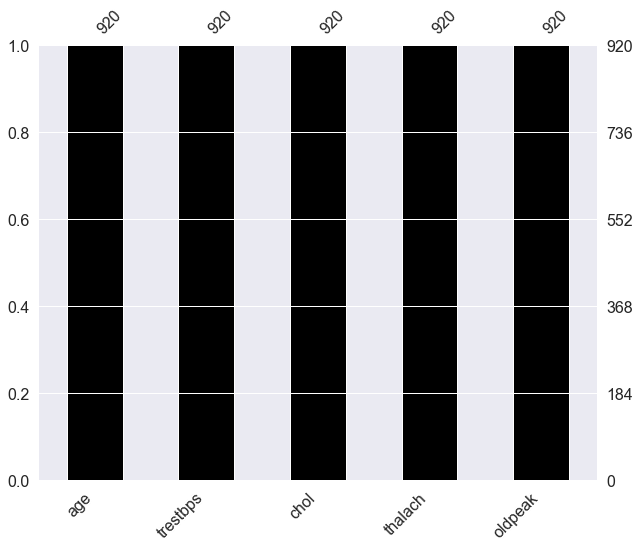

In [143]:
msn.bar(num_df,figsize=(10,8),color='black')

In [144]:
final_df =  pd.concat([num_df,cat_df],axis=1)

In [145]:
final_df

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,63.0,145.0,233.0,150.0,2.3,1,1,1,2,0,3,0,6,0
1,67.0,160.0,286.0,108.0,1.5,1,4,0,2,1,2,3,3,2
2,67.0,120.0,229.0,129.0,2.6,1,4,0,2,1,2,2,7,1
3,37.0,130.0,250.0,187.0,3.5,1,3,0,0,0,3,0,3,0
4,41.0,130.0,204.0,172.0,1.4,0,2,0,2,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,115.0,0.0,92.0,0.0,1,4,0,1,1,2,0,7,1
916,70.0,140.0,0.0,157.0,2.0,1,4,1,0,1,2,1,7,3
917,72.0,160.0,0.0,114.0,1.6,1,3,0,2,0,2,2,4,0
918,73.0,160.0,0.0,121.0,0.0,0,3,0,1,0,1,0,3,1


<Figure size 864x720 with 0 Axes>

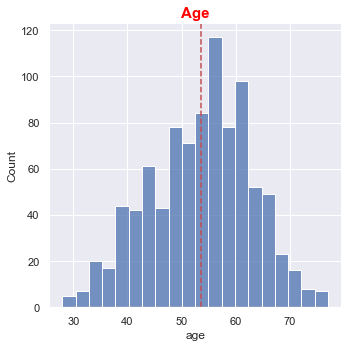

<Figure size 864x720 with 0 Axes>

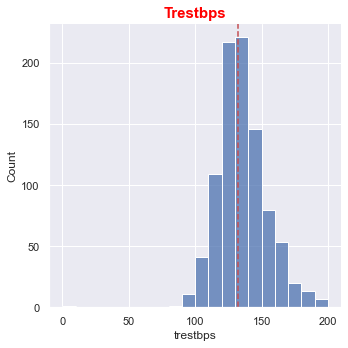

<Figure size 864x720 with 0 Axes>

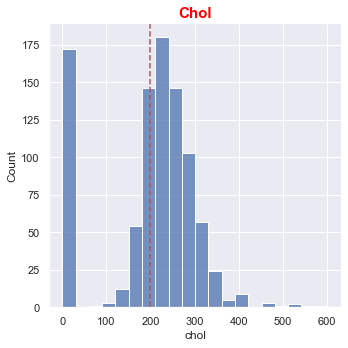

<Figure size 864x720 with 0 Axes>

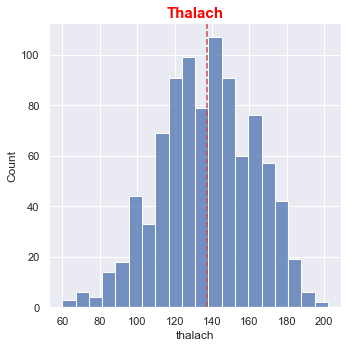

<Figure size 864x720 with 0 Axes>

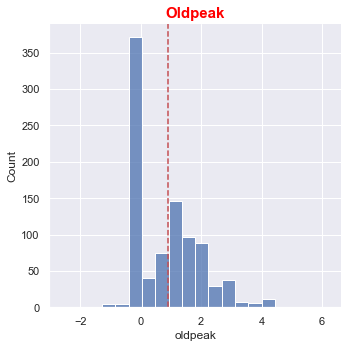

In [146]:
font_dict = {'fontsize': 15,'fontweight': 'bold','color': 'red'}
for item in numeric_var:
    plt.figure(figsize=(12,10))
    sns.displot(final_df[item],color='b',bins = 20,)
    plt.axvline(final_df[item].mean(),color='r',ls='--')
    plt.title(item.title(),font_dict)
    plt.tight_layout()
    plt.show()

In [147]:
categoric_axis_name = ['Gender','Chest Pain','Fasting Blood Sugar','Resting Electrocargigraphic Results','Exercise Induced Angina','The Slop of ST Segement','Number of Major Vessels','Thal','Target']

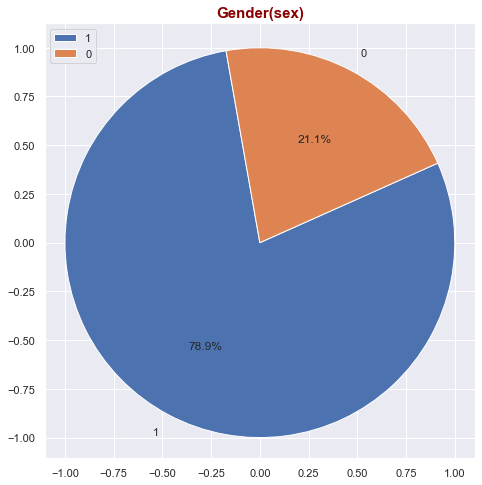

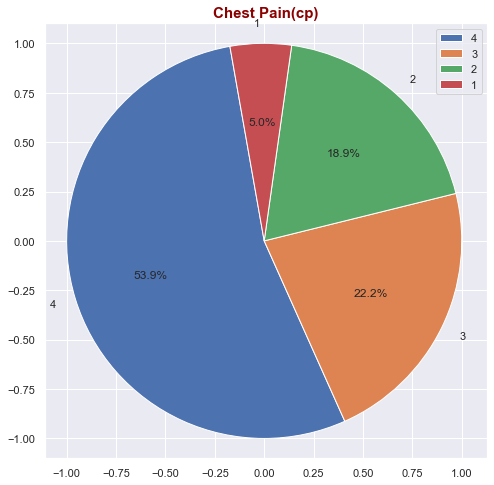

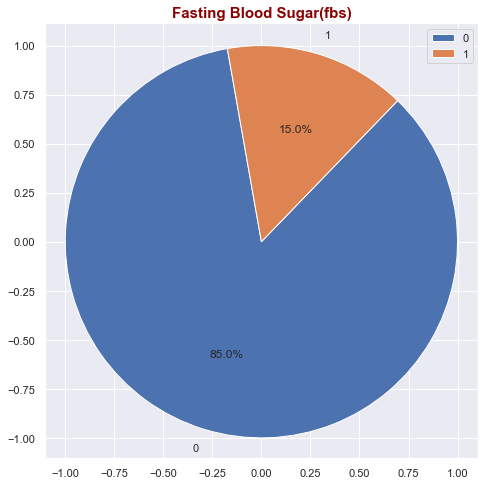

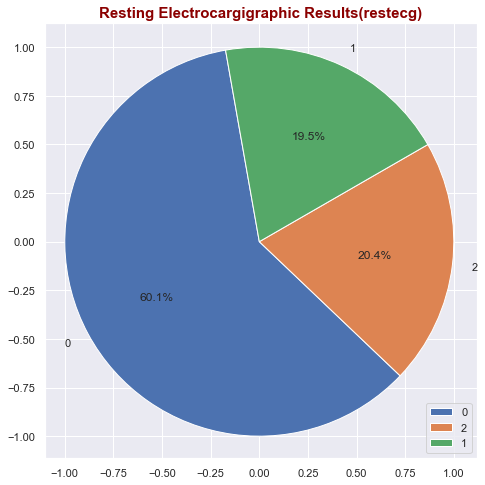

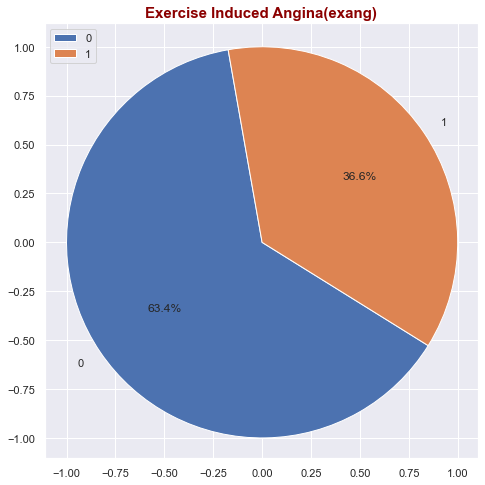

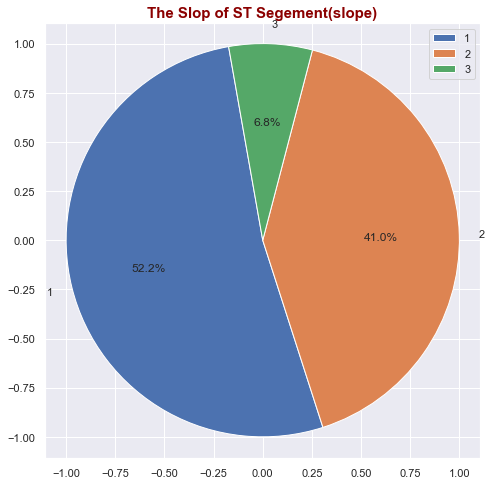

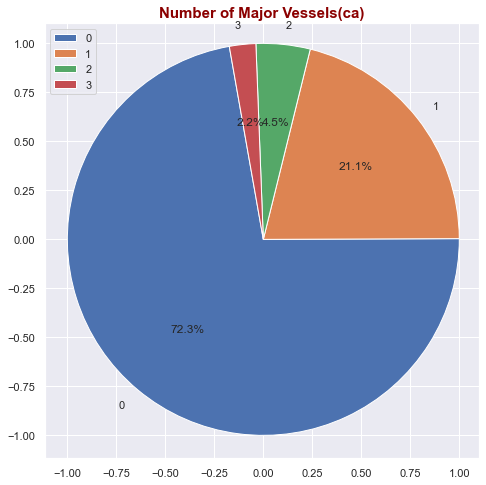

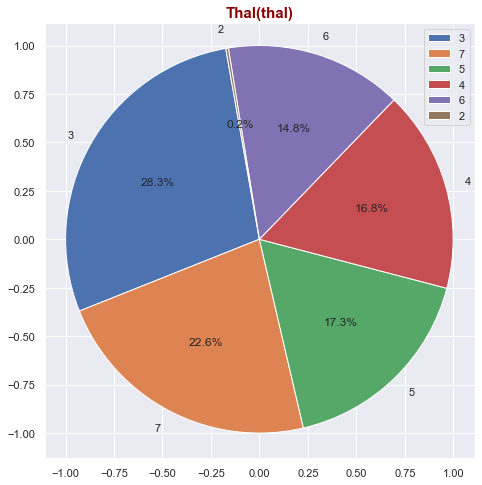

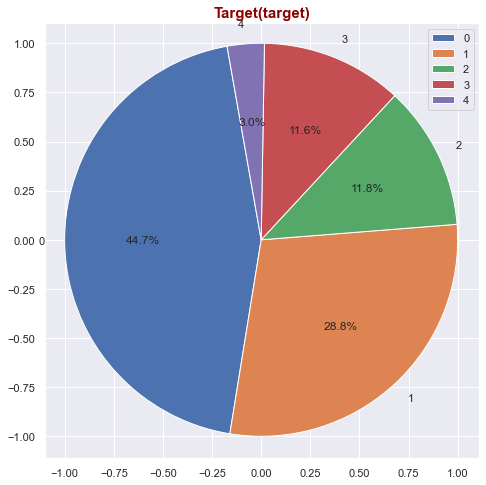

In [148]:
title_font = {'family':'arial','color':'darkred','weight':'bold','size':15}
axis_font = {'family':'arial','color':'darkblue','weight':'bold','size':13}
for i , z in list(zip(categorical_var,categoric_axis_name)):
    fig,ax = plt.subplots(figsize=(8,8))
    observation_index = list(final_df[i].value_counts().index)
    observation_values = list(final_df[i].value_counts())
    ax.pie(observation_values,labels=observation_index,autopct='%1.1f%%',startangle=100,frame=True)
    plt.title(z + "("+i+")",fontdict=title_font)
    plt.legend()
    

#### Fixing the Target

In [149]:
final_df['target'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: target, dtype: int64

In [150]:
final_df['target'] = final_df['target'].apply(lambda x : 1 if x >=1 else 0)

In [151]:
final_df['target'].value_counts()

1    509
0    411
Name: target, dtype: int64

#### Bi Variante Analysis

In [152]:
numeric_var.append('target')
# numeric_var.remove('target')
numeric_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

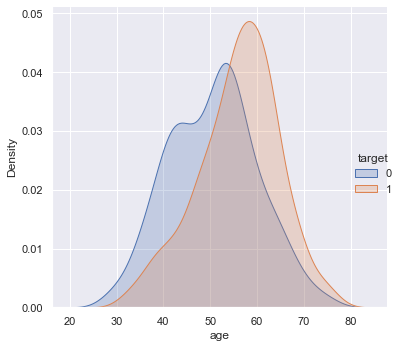

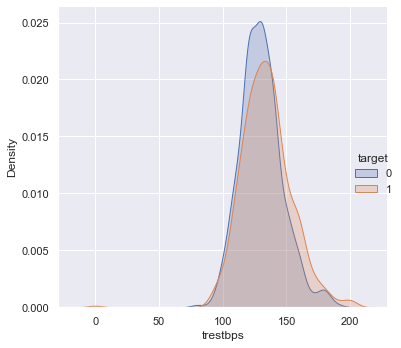

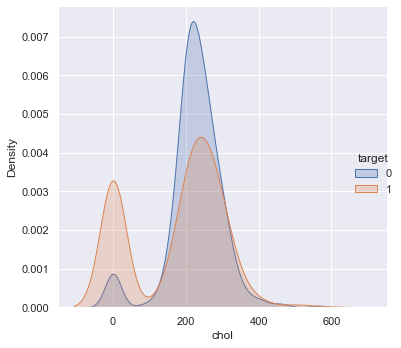

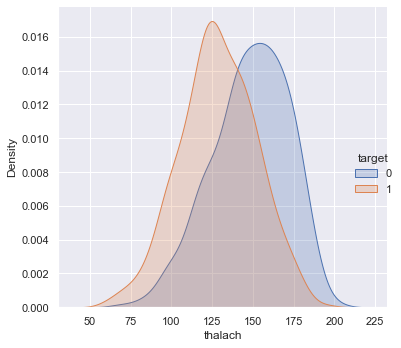

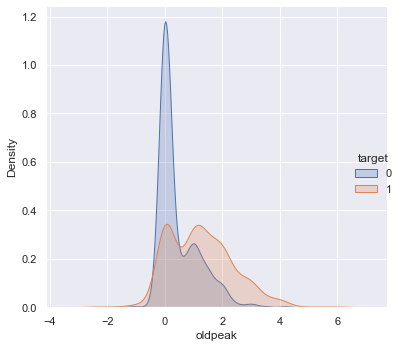

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


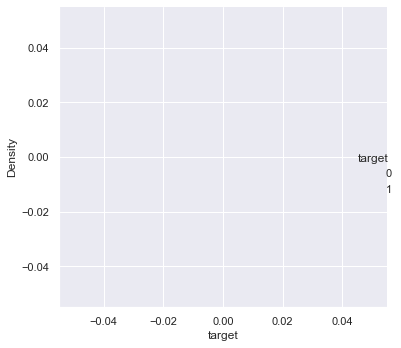

In [153]:
title_font = {'family':'arial','color':'darkred','weight':'bold','size':15}
axis_font = {'family':'arial','color':'darkblue','weight':'bold','size':13}
for i in numeric_var: 
    graph = sns.FacetGrid(final_df[numeric_var],hue = 'target', height = 5)
    graph.map(sns.kdeplot,i,shade=True)
    graph.add_legend()
    
    plt.tight_layout()
    plt.show()

In [154]:
final_df[numeric_var].corr()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.252614,-0.089569,-0.375591,0.266522,0.282700
trestbps,0.252614,1.000000,0.100119,-0.108305,0.166002,0.106521
chol,-0.089569,0.100119,1.000000,0.245962,0.047122,-0.228749
thalach,-0.375591,-0.108305,0.245962,1.000000,-0.154072,-0.386302
oldpeak,0.266522,0.166002,0.047122,-0.154072,1.000000,0.376081
target,0.282700,0.106521,-0.228749,-0.386302,0.376081,1.000000


In [155]:
final_df[numeric_var].corr().iloc[:,[-1]]

,target
age,0.282700
trestbps,0.106521
chol,-0.228749
thalach,-0.386302
oldpeak,0.376081
target,1.000000


C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


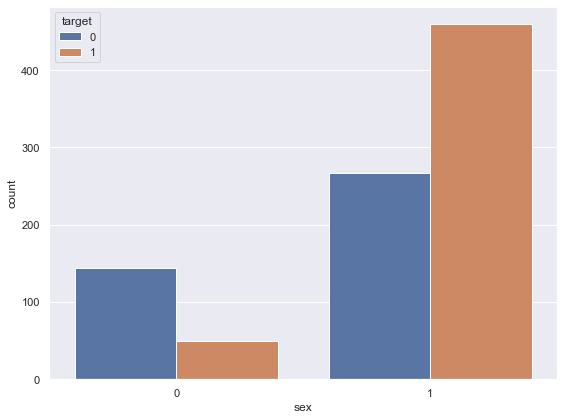

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


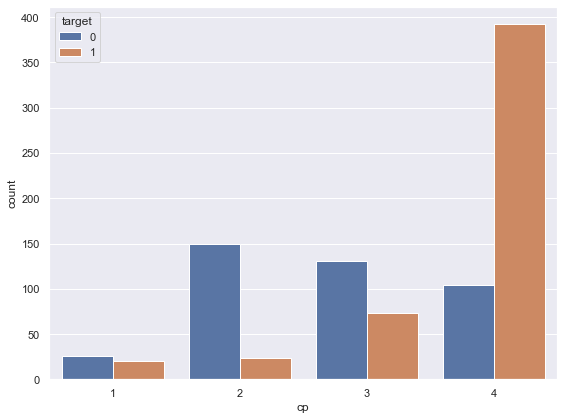

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


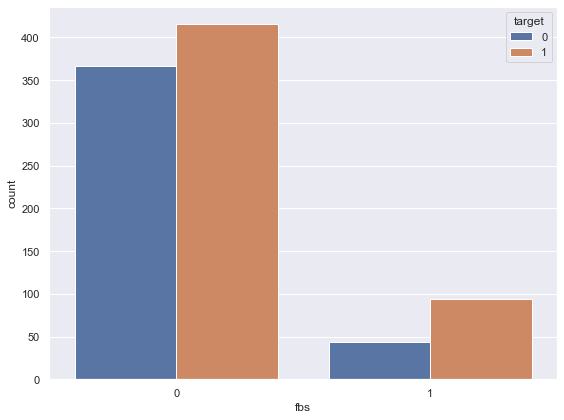

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


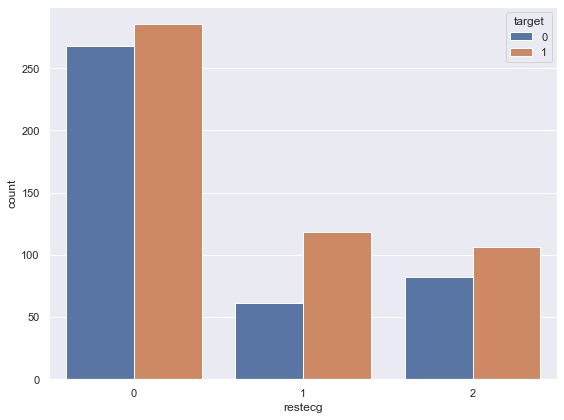

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


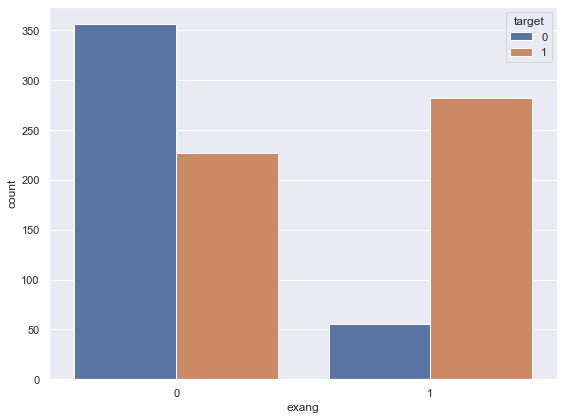

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


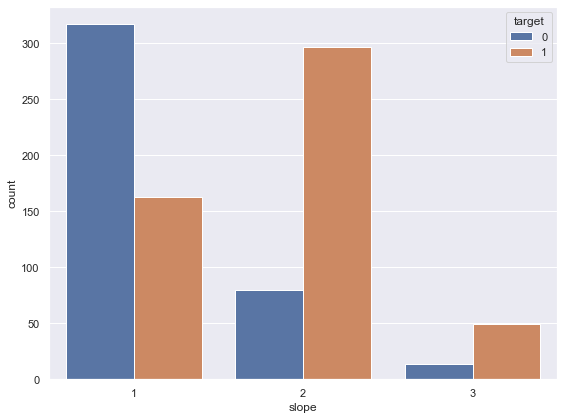

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


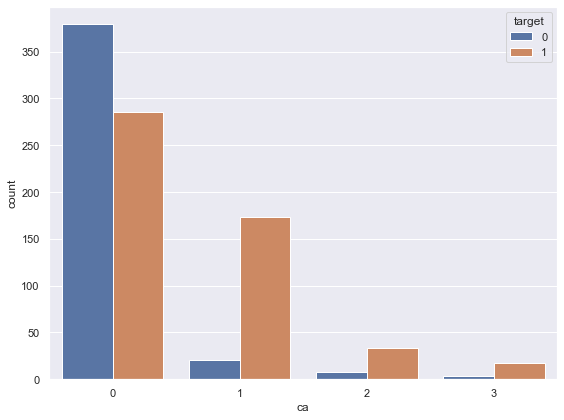

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


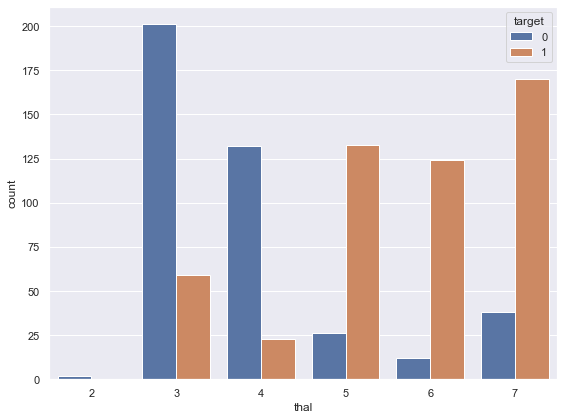

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


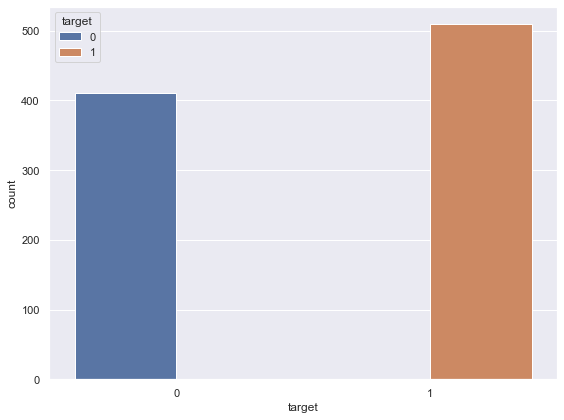

In [156]:
for variable , name in list(zip(categorical_var,categoric_axis_name)):
    plt.figure(figsize=(8,6))
    sns.countplot(variable,data=final_df[categorical_var],hue='target')
    plt.tight_layout()
    plt.show()

In [157]:
final_df[categorical_var].corr().iloc[:,[-1]]

,target
sex,0.307284
cp,0.471712
fbs,0.108071
restecg,0.062304
exang,0.433605
slope,0.411363
ca,0.338773
thal,0.562340
target,1.000000


In [158]:
numeric_var.remove('target')

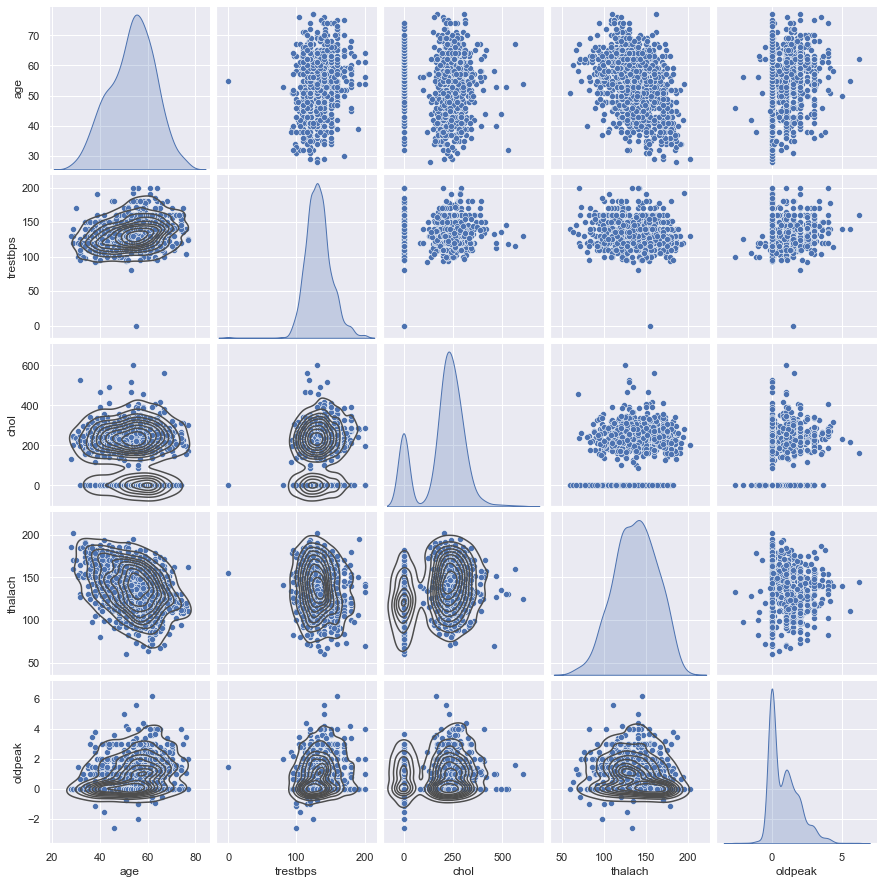

In [159]:
graph = sns.pairplot(final_df[numeric_var],diag_kind='kde')
graph.map_lower(sns.kdeplot,color ='.3')
plt.show()

#### Linear Algorithms

In [160]:
final_df

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,63.0,145.0,233.0,150.0,2.3,1,1,1,2,0,3,0,6,0
1,67.0,160.0,286.0,108.0,1.5,1,4,0,2,1,2,3,3,1
2,67.0,120.0,229.0,129.0,2.6,1,4,0,2,1,2,2,7,1
3,37.0,130.0,250.0,187.0,3.5,1,3,0,0,0,3,0,3,0
4,41.0,130.0,204.0,172.0,1.4,0,2,0,2,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,115.0,0.0,92.0,0.0,1,4,0,1,1,2,0,7,1
916,70.0,140.0,0.0,157.0,2.0,1,4,1,0,1,2,1,7,1
917,72.0,160.0,0.0,114.0,1.6,1,3,0,2,0,2,2,4,0
918,73.0,160.0,0.0,121.0,0.0,0,3,0,1,0,1,0,3,1


In [161]:
X = final_df.iloc[:,:-1].values
y = final_df.iloc[:,-1].values

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
clf_lr = LogisticRegression()

In [166]:
clf_lr.fit(X_train,y_train)

C:\Users\Mahmoud Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [167]:
y_pred = clf_lr.predict(X_test)

In [168]:
from sklearn.metrics import classification_report

In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       140
           1       0.85      0.86      0.86       164

    accuracy                           0.85       304
   macro avg       0.84      0.84      0.84       304
weighted avg       0.85      0.85      0.85       304



In [170]:
from sklearn.svm import SVC

In [217]:
clf_svm = SVC(C=100,kernel='rbf',degree=5)

In [218]:
clf_svm.fit(X_train,y_train)

SVC(C=100, degree=5)

In [219]:
y_pred_1 = clf_svm.predict(X_test)

In [220]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       140
           1       0.83      0.88      0.85       164

    accuracy                           0.84       304
   macro avg       0.84      0.84      0.84       304
weighted avg       0.84      0.84      0.84       304



In [222]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
clf_rf  = RandomForestClassifier(max_depth=10,criterion='entropy',min_samples_leaf=5)

In [240]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

In [241]:
y_pred_2 = clf_rf.predict(X_test)

In [242]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       140
           1       0.85      0.88      0.87       164

    accuracy                           0.86       304
   macro avg       0.86      0.85      0.85       304
weighted avg       0.86      0.86      0.85       304



#### Conclusion on Algorithms and final outcome